# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [105]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [106]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
#create test list
test_ls = ['hermanus', 'hasaki', 'barrow']
        
# Print the city count to confirm sufficient count
#len(cities)
#print(cities)
print(test_ls)

['hermanus', 'hasaki', 'barrow']


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [107]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

new_api = 'baa85d49f99b9efa2601907db53b1ec2'
part_li = []
coord = []
part_di = {}
part_df = pd.DataFrame()

for place in cities:
    city = place

    # Build query URL
    query_url = url + "appid=" + new_api + "&q=" + city
    response = requests.get(query_url)
    part = response.json()
    part_li.append(part)
    part_di.update({city : part})
    coord.append(part)
    time.sleep(1.1)

In [108]:
#lat_df = pd.DataFrame()
#lat_ls = []
#for city in cities:
    #lat_ls.append(part_di[city])
    
    #lat_df.append(part_di[city])
#for 
#lat_df.append(lat_ls)
#city_df = pd.DataFrame(cities)
#lat_df = pd.DataFrame(lat_ls, index=cities)
#lat_df
pull_di = {}
pull_li = []

#pull2_di works to pull all
pull2_di = {}
part_di['hermanus']
for city in cities:
    pull_di.update(part_di[city])
    pull_li.append(part_di[city])
    pull2_di[city] = part_di[city]
############Try this later at home    
    print(pull2_di)

{'taolanaro': {'cod': '404', 'message': 'city not found'},
 'mataura': {'coord': {'lon': 168.86, 'lat': -46.19},
  'weather': [{'id': 803,
    'main': 'Clouds',
    'description': 'broken clouds',
    'icon': '04d'}],
  'base': 'stations',
  'main': {'temp': 286.48,
   'pressure': 1005,
   'humidity': 87,
   'temp_min': 286.48,
   'temp_max': 286.48},
  'wind': {'speed': 8.94, 'deg': 226, 'gust': 16.99},
  'clouds': {'all': 83},
  'dt': 1574534124,
  'sys': {'type': 3,
   'id': 2008959,
   'country': 'NZ',
   'sunrise': 1574528065,
   'sunset': 1574582878},
  'timezone': 46800,
  'id': 6201424,
  'name': 'Mataura',
  'cod': 200},
 'atuona': {'coord': {'lon': -139.03, 'lat': -9.8},
  'weather': [{'id': 800,
    'main': 'Clear',
    'description': 'clear sky',
    'icon': '01d'}],
  'base': 'model',
  'main': {'temp': 299.6,
   'pressure': 1010,
   'humidity': 75,
   'temp_min': 299.6,
   'temp_max': 299.6,
   'sea_level': 1010,
   'grnd_level': 1010},
  'wind': {'speed': 7.22, 'deg': 72

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [190]:
weat_df = pd.DataFrame(pull2_di)
weat_piv = weat_df.transpose()
weat_piv

#no need for below
#cit_df = pd.DataFrame(cities)
#cit_df.index = cit_df[0]
#cit_df

#comb_df = pd.DataFrame(list(zip(cit_df[0], weat_piv.index)))
#comb_df = comb_df.set_index(0)
#con_df =  pd.concat([comb_df, weat_piv], axis=1)
#con_df = con_df.set_index(1)
#con_df

weat_piv
del weat_piv['message']
del weat_piv['cod']
weat_drop = weat_piv.dropna(how='all')
weat_drop.to_csv('CityWeather.csv')
weat_drop

coord  \
mataura        {'lon': 168.86, 'lat': -46.19}   
atuona          {'lon': -139.03, 'lat': -9.8}   
thai binh       {'lon': 106.33, 'lat': 20.45}   
pryazha          {'lon': 33.62, 'lat': 61.69}   
saskylakh       {'lon': 114.09, 'lat': 71.97}   
...                                       ...   
namibe          {'lon': 12.15, 'lat': -15.19}   
muros            {'lon': -9.06, 'lat': 42.77}   
san policarpo   {'lon': 125.51, 'lat': 12.18}   
rassvet          {'lon': 45.47, 'lat': 49.11}   
carutapera       {'lon': -46.02, 'lat': -1.2}   

                                                         weather      base  \
mataura        [{'id': 803, 'main': 'Clouds', 'description': ...  stations   
atuona         [{'id': 800, 'main': 'Clear', 'description': '...     model   
thai binh      [{'id': 801, 'main': 'Clouds', 'description': ...  stations   
pryazha        [{'id': 803, 'main': 'Clouds', 'description': ...  stations   
saskylakh      [{'id': 804, 'main': 'Clouds', 'description': ...     model   
...                                                          ...       ...   
namibe         [{'id': 802, 'main': 'Clouds', 'description': ...     model   
muros          [{'id': 802, 'main': 'Clouds', 'description': ...  stations   
san policarpo  [{'id': 500, 'main': 'Rain', 'description': 'l...     model   
rassvet        [{'id': 800, 'main': 'Clear', 'description': '...     model   
carutapera     [{'id': 804, 'main': 'Clouds', 'description': ...     model   

                                                            main  \
mataura        {'temp': 286.48, 'pressure': 1005, 'humidity':...   
atuona         {'temp': 299.6, 'pressure': 1010, 'humidity': ...   
thai binh      {'temp': 297.15, 'pressure': 1014, 'humidity':...   
pryazha        {'temp': 262.15, 'pressure': 1033, 'humidity':...   
saskylakh      {'temp': 243.2, 'pressure': 1017, 'humidity': ...   
...                                                          ...   
namibe         {'temp': 294.76, 'pressure': 1011, 'humidity':...   
muros          {'temp': 283.77, 'pressure': 1011, 'humidity':...   
san policarpo  {'temp': 300.27, 'pressure': 1009, 'humidity':...   
rassvet        {'temp': 267.8, 'pressure': 1040, 'humidity': ...   
carutapera     {'temp': 300.78, 'pressure': 1009, 'humidity':...   

                                                     wind        clouds  \
mataura        {'speed': 8.94, 'deg': 226, 'gust': 16.99}   {'all': 83}   
atuona                         {'speed': 7.22, 'deg': 72}    {'all': 3}   
thai binh                      {'speed': 2.6, 'deg': 110}   {'all': 20}   
pryazha                                      {'speed': 1}   {'all': 67}   
saskylakh                     {'speed': 1.06, 'deg': 113}   {'all': 98}   
...                                                   ...           ...   
namibe                        {'speed': 7.55, 'deg': 196}   {'all': 32}   
muros                          {'speed': 2.1, 'deg': 290}   {'all': 40}   
san policarpo                  {'speed': 3.21, 'deg': 14}   {'all': 50}   
rassvet                        {'speed': 3.24, 'deg': 62}    {'all': 0}   
carutapera                     {'speed': 5.14, 'deg': 75}  {'all': 100}   

                       dt                                                sys  \
mataura        1574534124  {'type': 3, 'id': 2008959, 'country': 'NZ', 's...   
atuona         1574534125  {'country': 'PF', 'sunrise': 1574520264, 'suns...   
thai binh      1574534126  {'type': 1, 'id': 9302, 'country': 'VN', 'sunr...   
pryazha        1574534127  {'type': 1, 'id': 8929, 'country': 'RU', 'sunr...   
saskylakh      1574534130       {'country': 'RU', 'sunrise': 0, 'sunset': 0}   
...                   ...                                                ...   
namibe         1574534846  {'country': 'AO', 'sunrise': 1574483469, 'suns...   
muros          1574534847  {'type': 1, 'id': 6434, 'country': 'ES', 'sunr...   
san policarpo  1574534849  {'country': 'PH', 'sunrise': 1574545165, 'suns...

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [207]:
lat_ls = weat_drop['coord']
temp_ls = weat_drop['main']
lat_di = {}
temp_di = {}
drop_cit = weat_drop.index

for city in drop_cit:
    lat_di[city] = lat_ls[city]['lat']    
    temp_di[city] = temp_ls[city]['temp']
    
#convert kelvin to farenheit
temp_f = []

for val in temp_di.values():
    temp_f.append((val - 273.15) * (9/5) + 32)

    
lat_t_df = pd.DataFrame(list(zip(lat_di.values(), temp_f)), columns=['Latitude', 'Temperature'],index=lat_di.keys())
lat_t_df.to_csv('Lat_Vs_Temp.csv')
lat_t_df

Latitude  Temperature
mataura          -46.19       55.994
atuona            -9.80       79.610
thai binh         20.45       75.200
pryazha           61.69       12.200
saskylakh         71.97      -21.910
...                 ...          ...
namibe           -15.19       70.898
muros             42.77       51.116
san policarpo     12.18       80.816
rassvet           49.11       22.370
carutapera        -1.20       81.734

[543 rows x 2 columns]

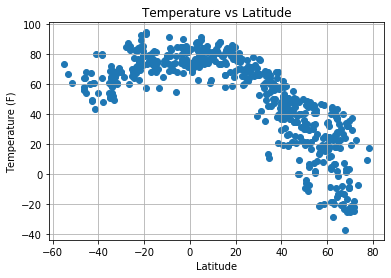

In [209]:
plt.scatter(lat_t_df['Latitude'], lat_t_df['Temperature'])
plt.title("Temperature vs Latitude")
plt.ylabel('Temperature (F)')
plt.xlabel("Latitude")
plt.grid(True)
# Save the Figure
plt.savefig('Temperature vs Lat.png')
# Show the Figure
plt.show()

#### Latitude vs. Humidity Plot

In [219]:
lat_ls = weat_drop['coord']
hum_ls = weat_drop['main']
lat_di = {}
hum_di = {}
drop_cit = weat_drop.index


for city in drop_cit:
    lat_di[city] = lat_ls[city]['lat']    
    hum_di[city] = hum_ls[city]['humidity']
    
lat_h_df = pd.DataFrame(list(zip(lat_di.values(), hum_di.values())), columns=['Latitude', 'Humidity (%)'],index=lat_di.keys())
lat_h_df.to_csv('Lat_Vs_Humidity.csv')
lat_h_df

Latitude  Humidity (%)
mataura          -46.19            87
atuona            -9.80            75
thai binh         20.45            88
pryazha           61.69            92
saskylakh         71.97            99
...                 ...           ...
namibe           -15.19            84
muros             42.77           100
san policarpo     12.18            86
rassvet           49.11            68
carutapera        -1.20            78

[543 rows x 2 columns]

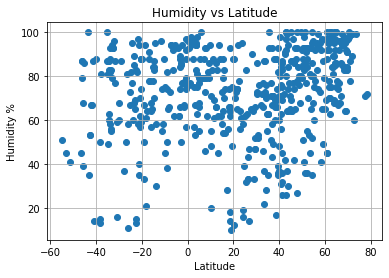

In [220]:
plt.scatter(lat_h_df['Latitude'], lat_h_df['Humidity (%)'])
plt.title("Humidity vs Latitude")
plt.ylabel('Humidity %')
plt.xlabel("Latitude")
plt.grid(True)
# Save the Figure
plt.savefig('Humidity vs Lat.png')
# Show the Figure
plt.show()

#### Latitude vs. Cloudiness Plot

In [217]:
lat_ls = weat_drop['coord']
cloud_ls = weat_drop['clouds']
lat_di = {}
cloud_di = {}
drop_cit = weat_drop.index


for city in drop_cit:
    lat_di[city] = lat_ls[city]['lat']    
    cloud_di[city] = cloud_ls[city]['all']
    
lat_c_df = pd.DataFrame(list(zip(lat_di.values(), cloud_di.values())), columns=['Latitude', 'Cloudiness (%)'],index=lat_di.keys())
lat_c_df.to_csv('Lat_Vs_Cloudiness.csv')
lat_c_df

Latitude  Cloudiness (%)
mataura          -46.19              83
atuona            -9.80               3
thai binh         20.45              20
pryazha           61.69              67
saskylakh         71.97              98
...                 ...             ...
namibe           -15.19              32
muros             42.77              40
san policarpo     12.18              50
rassvet           49.11               0
carutapera        -1.20             100

[543 rows x 2 columns]

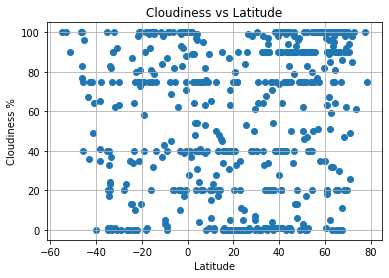

In [218]:
plt.scatter(lat_c_df['Latitude'], lat_c_df['Cloudiness (%)'])
plt.title("Cloudiness vs Latitude")
plt.ylabel('Cloudiness %')
plt.xlabel("Latitude")
plt.grid(True)
# Save the Figure
plt.savefig('Cloudiness vs Lat.png')
# Show the Figure
plt.show()

#### Latitude vs. Wind Speed Plot

In [215]:
lat_ls = weat_drop['coord']
wind_ls = weat_drop['wind']
lat_di = {}
wind_di = {}
drop_cit = weat_drop.index

for city in drop_cit:
    lat_di[city] = lat_ls[city]['lat']    
    wind_di[city] = wind_ls[city]['speed']
    
speed = []
    
#convert wind speed from m/s to mph
for val in wind_di.values():
    speed.append(val * 2.236936)
    
lat_w_df = pd.DataFrame(list(zip(lat_di.values(), speed)), columns=['Latitude', 'Wind Speed (mph)'],index=lat_di.keys())
lat_w_df.to_csv('Lat_Vs_WindSpeed.csv')
lat_w_df

Latitude  Wind Speed (mph)
mataura          -46.19         19.998208
atuona            -9.80         16.150678
thai binh         20.45          5.816034
pryazha           61.69          2.236936
saskylakh         71.97          2.371152
...                 ...               ...
namibe           -15.19         16.888867
muros             42.77          4.697566
san policarpo     12.18          7.180565
rassvet           49.11          7.247673
carutapera        -1.20         11.497851

[543 rows x 2 columns]

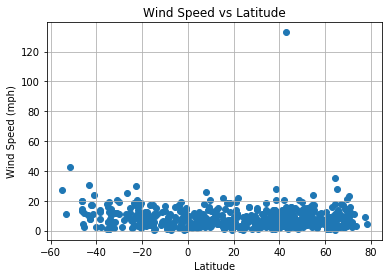

In [216]:
plt.scatter(lat_w_df['Latitude'], lat_w_df['Wind Speed (mph)'])
plt.title("Wind Speed vs Latitude")
plt.ylabel('Wind Speed (mph)')
plt.xlabel("Latitude")
plt.grid(True)
# Save the Figure
plt.savefig('Wind Speed vs Lat.png')
# Show the Figure
plt.show()